# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [85]:
# import libraries here
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [7]:
# your answer here
df = pd.read_csv("Temp_States.csv")

#### Print `temp`

In [6]:
df

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [11]:
# your answer here
df.dtypes

City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [16]:
# your answer here
df[df['State'] == 'New York']

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [21]:
# your answer here
df[df['State'] == 'New York'].Temperature.mean()

10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [23]:
# your answer here
df[['City', 'State']] [df['Temperature'] > 15]

,City,State
0,NYC,New York
3,Hartford,Connecticut
5,Treton,New Jersey
6,Newark,New Jersey


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [24]:
# your answer here
df[['City']] [df['Temperature'] > 15]

,City
0,NYC
3,Hartford
5,Treton
6,Newark


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [25]:
# your answer here
df[['City']] [(df['Temperature'] > 15)&(df['Temperature'] < 20)]

,City
0,NYC
3,Hartford


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [27]:
# your answer here
df.groupby(['State'])['Temperature'].mean()

State
Connecticut    15.833333
New Jersey     21.111111
New York       10.740741
Name: Temperature, dtype: float64

In [28]:
df.groupby(['State'])['Temperature'].std()

State
Connecticut    1.964186
New Jersey     1.571348
New York       8.133404
Name: Temperature, dtype: float64

# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [30]:
# your answer here
df = pd.read_csv("employee.csv")
df

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [31]:
# your answer here
df.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

In [ ]:
DataFrame.hist(column=None, by=None, grid=True, xlabelsize=None, xrot=None, ylabelsize=None, yrot=None, ax=None, sharex=False, sharey=False, figsize=None, layout=None, bins=10, backend=None, legend=False, **kwargs)

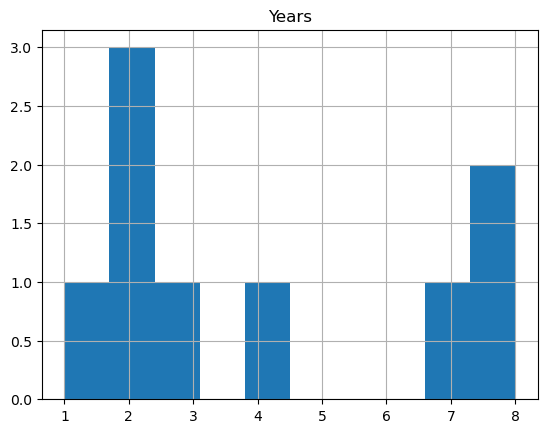

In [37]:
# your answer here
# Years histogram
df.hist(column='Years');
# The most frecuent seniority in the company are 2 years. 
# The most senior worker has been 8 years working for the company.
# The less senior worker has been 1 year working for the company.

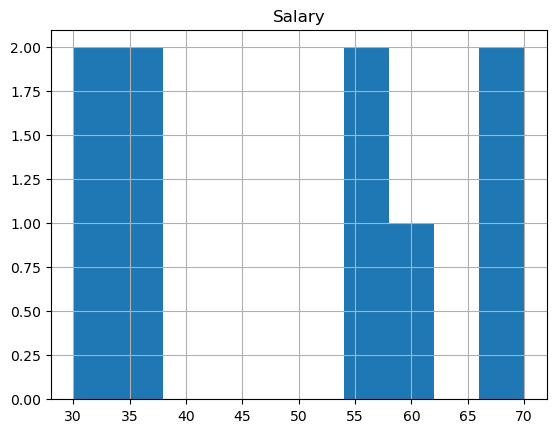

In [36]:
# Salary histogram
df.hist(column='Salary');
# Salaries are equally distributed, except for people with a salarie of 60k, meaning that the number of workers earing salaries are the same for each quantity.

#### What's the average salary in this company?

In [39]:
# your answer here
df['Salary'].mean()

48.888888888888886

#### What's the highest salary?

In [40]:
# your answer here
df['Salary'].max()

70

#### What's the lowest salary?

In [41]:
# your answer here
df['Salary'].min()

30

#### Who are the employees with the lowest salary?

In [52]:
# your answer here
df[['Name']][df['Salary'] == df['Salary'].min()]

,Name
1,Maria
2,David


#### Could you give all the information about an employee called David?

In [53]:
# your answer here
df[df['Name'] == 'David']

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [54]:
# your answer here
df[['Salary']][df['Name'] == 'David']

,Salary
2,30


#### Print all the rows where job title is associate

In [55]:
# your answer here
df[df['Title'] == 'associate']

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [59]:
# your answer here- 1 method
df.iloc[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [61]:
# your answer here- 2nd method
df.loc[:2]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [62]:
# your answer here
df[['Name']] [(df['Title'] == 'associate')&(df['Salary'] > 55)]

,Name
7,Pedro


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [63]:
# your answer here
df.groupby(['Years'])['Salary'].mean()

Years
1    35.000000
2    38.333333
3    55.000000
4    35.000000
7    60.000000
8    70.000000
Name: Salary, dtype: float64

####  What is the average Salary per title?

In [64]:
# your answer here
df.groupby(['Title'])['Salary'].mean()

Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

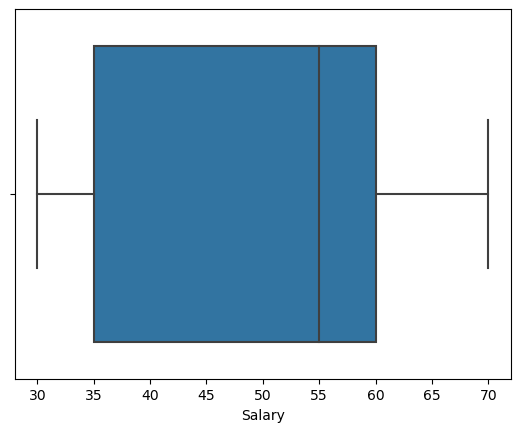

In [73]:
# draw boxplot here
sns.boxplot(x=df['Salary']);

In [74]:
# print first quartile here
df.dropna().Salary.quantile(.25)

35.0

In [76]:
# print third quartile here
df.dropna().Salary.quantile(.75)

60.0

In [77]:
# Workers have a salary between30k-70k
# Half of the workers have a salary between 35k-60k
# 25% of workers have a salary bweteen 30k-35k
# 75% of workers have a salary bweteen 30k-60k
# The median (central value) is 55.
# There are not values far away from the where most of the values are (outliers)

#### Is the mean salary per gender different?

In [79]:
# your answer here
df.groupby(['Gender'])['Salary'].mean()

Gender
F    47.5
M    50.0
Name: Salary, dtype: float64

In [ ]:
# Yes, the mean salary is different for each gender

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [ ]:
# your answer here

In [89]:
# Min
df.groupby(['Department'])['Salary','Years'].min()

,Salary,Years
Department,,
HR,30,2
IT,30,1
Sales,55,2


In [90]:
# Mean
df.groupby(['Department'])['Salary','Years'].mean()

,Salary,Years
Department,,
HR,45.00,4.666667
IT,48.75,4.500000
Sales,55.00,2.500000


In [91]:
# Max
df.groupby(['Department'])['Salary','Years'].max()

,Salary,Years
Department,,
HR,70,8
IT,70,8
Sales,55,3


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [93]:
# your answer here

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [99]:
# your answer here
df = pd.read_csv("Orders.csv")
df

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397919,541904,581587,22613,2011,12,5,12,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France,10.20
397920,541905,581587,22899,2011,12,5,12,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France,12.60
397921,541906,581587,23254,2011,12,5,12,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France,16.60
397922,541907,581587,23255,2011,12,5,12,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France,16.60


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [100]:
# your answer here
df.dtypes

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [105]:
# your answer here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    397924 non-null  int64  
 1   InvoiceNo     397924 non-null  int64  
 2   StockCode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   Description   397924 non-null  object 
 8   Quantity      397924 non-null  int64  
 9   InvoiceDate   397924 non-null  object 
 10  UnitPrice     397924 non-null  float64
 11  CustomerID    397924 non-null  int64  
 12  Country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB


####  What is the average Purchase Price?

In [106]:
# your answer here
df['amount_spent'].mean()

22.394748504739596

#### What were the highest and lowest purchase prices? 

In [107]:
# your answer here
df['amount_spent'].max()

168469.6

In [108]:
# your answer here
df['amount_spent'].min()

0.0

#### Select all the customers we have in Spain

In [194]:
# your answer here
df[['CustomerID']][df['Country'] == 'Spain']

,CustomerID
4250,12557
4251,12557
4252,12557
4253,12557
4254,12557
...,...
394733,17097
394734,17097
394735,17097
394736,17097


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [189]:
# your answer here
df[['CustomerID']][df['Country'] == 'Spain'].value_counts().unique().sum()

2422

#### Select all the customers who have bought more than 50 items ?

In [119]:
# your answer here
df[['CustomerID']][df['Quantity'] > 50]

,CustomerID
46,13748
83,15291
96,14688
102,14688
174,16029
...,...
397720,18102
397721,16626
397729,16626
397761,15311


#### Select orders from Spain that are above 50 items

In [120]:
# your answer here
df[['Unnamed: 0']][(df['Country'] == 'Spain')&(df['Quantity'] > 50)]

,Unnamed: 0
4250,6421
4251,6422
4252,6423
4253,6424
4254,6425
32454,52416
32455,52417
32456,52418
32457,52419
91155,136767


#### Select all free orders

In [122]:
# your answer here
df[['Unnamed: 0']][df['amount_spent'] == 50]

,Unnamed: 0
1412,1423
1761,2328
8509,12119
8841,12452
13096,19975
...,...
389442,527532
393356,533878
393795,534323
394374,534909


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [144]:
# your answer here
df[['Unnamed: 0']][df['Description'].str.contains('lunch bag')]

,Unnamed: 0
93,93
172,174
354,363
359,368
360,369
...,...
397465,540436
397713,541695
397714,541696
397877,541862


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [145]:
# your answer here
df[['Unnamed: 0']][(df['Description'].str.contains('lunch bag'))&(df['year'] == 2011)]

,Unnamed: 0
26340,42678
26341,42679
26512,42851
26513,42852
26860,43616
...,...
397465,540436
397713,541695
397714,541696
397877,541862


#### Show the frequency distribution of the amount spent in Spain.

<Axes: >

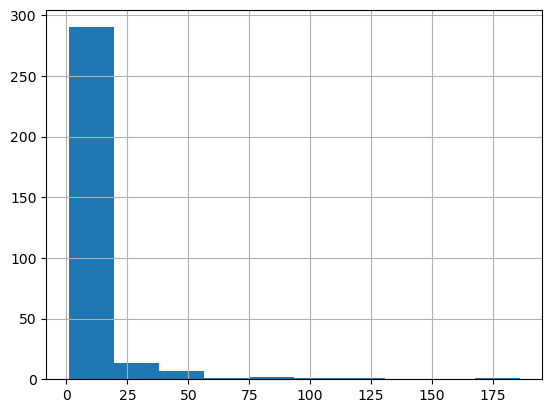

In [184]:
# your answer here
df[df['Country'] == 'Spain']['amount_spent'].value_counts().hist()

#### Select all orders made in the month of August

In [160]:
# your answer here
df[['Unnamed: 0']][(df['month'] == 8)]

,Unnamed: 0
199475,285421
199476,285422
199477,285423
199478,285424
199479,285425
...,...
226483,320688
226484,320689
226485,320690
226486,320691


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [174]:
# your answer here
df[df['month'] == 8]['Country'].value_counts()

United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: Country, dtype: int64

#### What's the  average amount of money spent by country

In [176]:
# your answer here
df.groupby(['Country'])['amount_spent'].mean()

Country
Australia               116.895620
Austria                  25.624824
Bahrain                  32.258824
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     36.687745
European Community       21.670833
Finland                  32.913985
France                   25.056827
Germany                  25.311562
Greece                   32.831172
Iceland                  23.681319
Israel                   29.119718
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.872702
RSA                      17.281207
Saudi Arabia

#### What's the most expensive item?

In [181]:
# your answer here
df['UnitPrice'].max()

8142.75

#### What was the average amount spent per year ?

In [180]:
# your answer here
df.groupby(['year'])['amount_spent'].mean()

year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64